#**Proyecto Telecom X_2: Análisis de Evasión de Clientes**


#Preparacion de los Datos

In [6]:
#Cargaremos el archivo CSV que contiene los datos tratados anteriormente.
import pandas as pd
datos = pd.read_csv('/content/datos_tratados.csv')


In [7]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,1,1,65.6,593.30,2.186667,False,False,False,True,4
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,59.9,542.40,1.996667,False,False,False,True,3
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,1,73.9,280.85,2.463333,False,False,True,False,2
3,0011igkff,1,0,1,1,0,13,1,0,2,...,0,1,98.0,1237.85,3.266667,False,False,True,False,5
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,1,83.9,267.40,2.796667,False,False,False,True,3


In [8]:
datos.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,ServiciosContratados
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,...,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,64.761692,2283.296277,2.158723,3.362914
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,...,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,30.090047,2265.000260,1.003002,2.062031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000,1.183333,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1400.550000,2.345000,3.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,118.750000,8684.800000,3.958333,8.000000


In [9]:
datos.describe(include='O')

,customerID
count,7043
unique,7043
top,9995hotoh
freq,1


In [11]:
columns_to_drop = ['customerID']

datos_borrado = datos.drop(columns=columns_to_drop)

datos_borrado.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados
0,0,1,0,1,1,9,1,0,1,0,...,1,1,65.6,593.30,2.186667,False,False,False,True,4
1,0,0,0,0,0,9,1,1,1,0,...,0,0,59.9,542.40,1.996667,False,False,False,True,3
2,1,0,0,0,0,4,1,0,2,0,...,0,1,73.9,280.85,2.463333,False,False,True,False,2
3,1,0,1,1,0,13,1,0,2,0,...,0,1,98.0,1237.85,3.266667,False,False,True,False,5
4,1,1,1,1,0,3,1,0,2,0,...,0,1,83.9,267.40,2.796667,False,False,False,True,3


In [16]:
datos_codificado = pd.get_dummies(datos_borrado, drop_first=True)
datos_codificado.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados
0,0,1,0,1,1,9,1,0,1,0,...,1,1,65.6,593.30,2.186667,False,False,False,True,4
1,0,0,0,0,0,9,1,1,1,0,...,0,0,59.9,542.40,1.996667,False,False,False,True,3
2,1,0,0,0,0,4,1,0,2,0,...,0,1,73.9,280.85,2.463333,False,False,True,False,2
3,1,0,1,1,0,13,1,0,2,0,...,0,1,98.0,1237.85,3.266667,False,False,True,False,5
4,1,1,1,1,0,3,1,0,2,0,...,0,1,83.9,267.40,2.796667,False,False,False,True,3


In [18]:
churn_proporcion = datos_codificado['Churn'].value_counts(normalize=True)
churn_proporcion

,proportion
Churn,
0,0.73463
1,0.26537


#Correlación y Selección de Variables

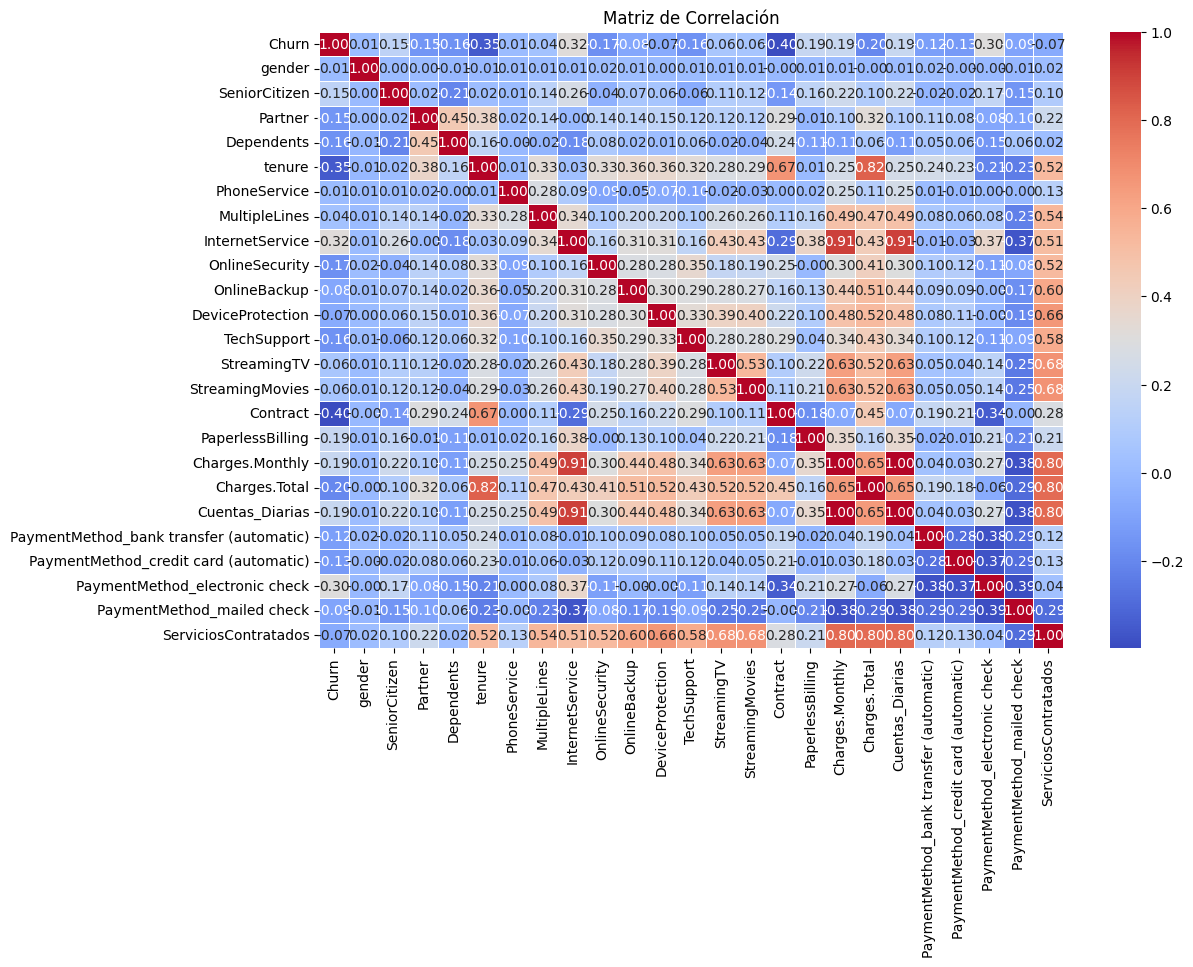

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = datos_codificado.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


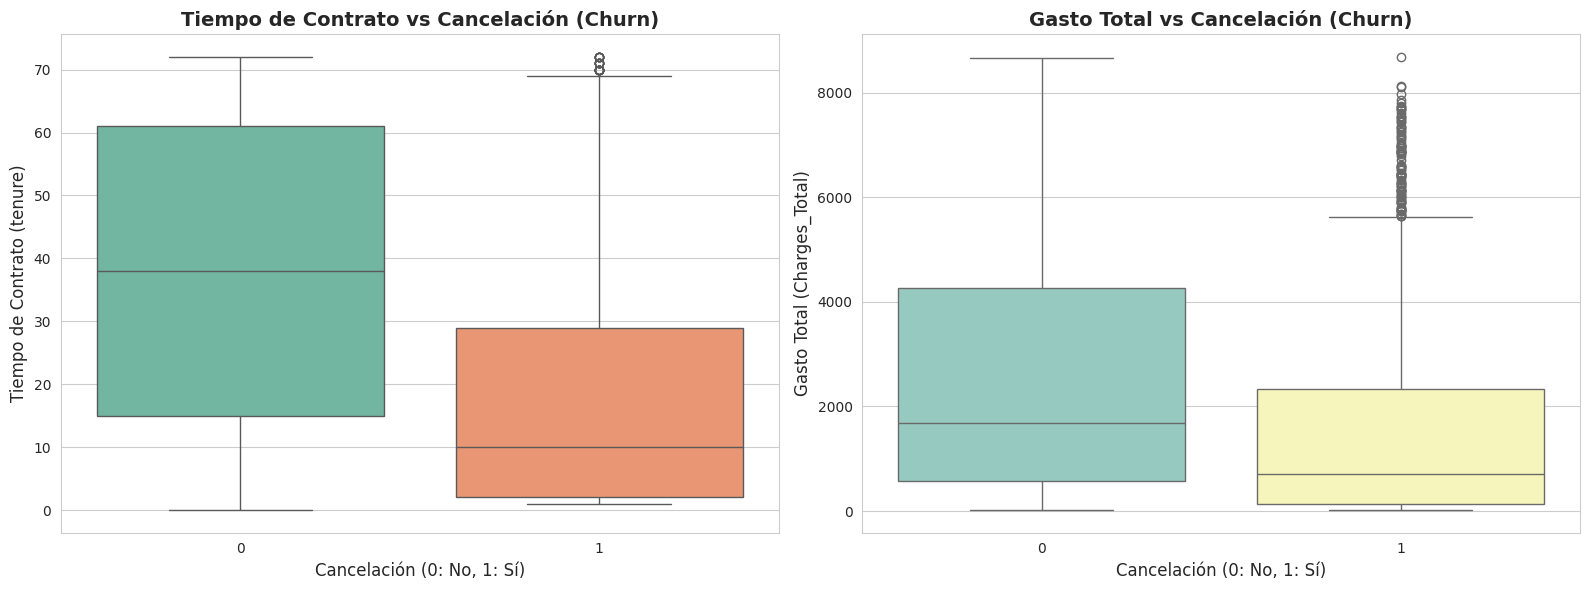

In [24]:
# Estilo de Seaborn
sns.set_style("whitegrid")

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot 1: Tiempo de contrato vs Cancelación
sns.boxplot(ax=axes[0], x='Churn', y='tenure', hue='Churn', data=datos_codificado,
            palette="Set2", legend=False)
axes[0].set_title("Tiempo de Contrato vs Cancelación (Churn)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Cancelación (0: No, 1: Sí)", fontsize=12)
axes[0].set_ylabel("Tiempo de Contrato (tenure)", fontsize=12)

# Boxplot 2: Gasto total vs Cancelación
sns.boxplot(ax=axes[1], x='Churn', y='Charges.Total', hue='Churn', data=datos_codificado,
            palette="Set3", legend=False)
axes[1].set_title("Gasto Total vs Cancelación (Churn)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Cancelación (0: No, 1: Sí)", fontsize=12)
axes[1].set_ylabel("Gasto Total (Charges_Total)", fontsize=12)

# Ajustar layout
plt.tight_layout()
plt.show()


#Modelado Predictivo

In [25]:
from sklearn.model_selection import train_test_split

X = datos_codificado.drop(columns=['Churn'])
y = datos_codificado['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((5634, 24), (1409, 24), (5634,), (1409,))

#Modelo:
##Random Forest y XGBoost

In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

print("Random Forest - Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_predictions))

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

print("XGBoost - Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost - Classification Report:")
print(classification_report(y_test, xgb_predictions))

Random Forest - Accuracy: 0.7920511000709723
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

XGBoost - Accuracy: 0.7806955287437899
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.61      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:00:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# XGBoost
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

# Diccionarios con métricas
rf_metrics = {
    "Accuracy": rf_accuracy,
    "Precision": rf_precision,
    "Recall": rf_recall,
    "F1-score": rf_f1,
    "Confusion Matrix": rf_conf_matrix
}

xgb_metrics = {
    "Accuracy": xgb_accuracy,
    "Precision": xgb_precision,
    "Recall": xgb_recall,
    "F1-score": xgb_f1,
    "Confusion Matrix": xgb_conf_matrix
}

rf_metrics, xgb_metrics


({'Accuracy': 0.7920511000709723,
  'Precision': 0.6481481481481481,
  'Recall': 0.4691689008042895,
  'F1-score': 0.5443234836702955,
  'Confusion Matrix': array([[941,  95],
         [198, 175]])},
 {'Accuracy': 0.7806955287437899,
  'Precision': 0.6073825503355704,
  'Recall': 0.48525469168900803,
  'F1-score': 0.5394932935916542,
  'Confusion Matrix': array([[919, 117],
         [192, 181]])})

In [29]:
# Importar las bibliotecas necesarias
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Asegurarse de tener los datos divididos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputar los valores faltantes en las características (X) usando la media
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)

# 1. Ajuste de Hiperparámetros para Random Forest usando GridSearchCV
rf_model = RandomForestClassifier(random_state=42)

# Definir el espacio de hiperparámetros para Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [5, 10, 15, None],  # Profundidad de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'max_features': ['auto', 'sqrt', 'log2']  # Número de características para dividir en cada nodo
}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_res, y_train_res)

# Obtener el mejor modelo y evaluar
best_rf_model = grid_search_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_test_imputed)

# Evaluar el modelo de Random Forest
print("Random Forest - Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_predictions))

# 2. Ajuste de Hiperparámetros para XGBoost usando GridSearchCV
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Definir el espacio de hiperparámetros para XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [3, 5, 10],  # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'subsample': [0.8, 0.9, 1.0],  # Proporción de muestras utilizadas
    'colsample_bytree': [0.8, 0.9, 1.0]  # Proporción de características utilizadas
}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_res, y_train_res)

# Obtener el mejor modelo y evaluar
best_xgb_model = grid_search_xgb.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test_imputed)

# Evaluar el modelo de XGBoost
print("XGBoost - Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost - Classification Report:")
print(classification_report(y_test, xgb_predictions))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
92 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils

Random Forest - Accuracy: 0.78708303761533
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:36:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Accuracy: 0.794180269694819
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.64      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



#📊 Análisis Comparativo de Desempeño de los Modelos
¿Cuál modelo tuvo el mejor desempeño?

Exactitud (Accuracy):

Random Forest alcanzó 79.2%, ligeramente superior a XGBoost (78.1%).

Ambos modelos tienen un rendimiento similar, pero Random Forest muestra una leve ventaja en la clasificación general.

Precisión (Precision) en la clase "Sí cancelaron" (1):

Random Forest: 0.65

XGBoost: 0.61

🔎 Esto indica que Random Forest es más confiable al predecir cancelaciones, reduciendo falsos positivos.

Recall (Sensibilidad) en la clase "Sí cancelaron" (1):

Random Forest: 0.47

XGBoost: 0.49

🔎 XGBoost detecta ligeramente más cancelaciones reales, aunque la diferencia es pequeña.

F1-score en la clase "Sí cancelaron":

Random Forest: 0.54

XGBoost: 0.54

🔎 Prácticamente idénticos en balance entre precisión y recall.

📌 Conclusión parcial:

Random Forest es mejor en precisión, lo que significa menos falsas alarmas.

XGBoost es un poco mejor en recall, detectando más cancelaciones reales.

Ambos modelos tienen un desempeño muy cercano, pero la elección depende de si priorizas precisión (RF) o recall (XGB).

¿Algún modelo presentó overfitting o underfitting?
🔹 Evidencia de Underfitting:

El recall en la clase minoritaria (cancelaciones) es bajo en ambos modelos (~47–49%).

Esto significa que no logran identificar correctamente a la mayoría de clientes que cancelan, lo que es crítico para el negocio.

A pesar de la aplicación de técnicas de balanceo, los modelos siguen favoreciendo la clase mayoritaria (clientes activos).

🔹 Posibles causas:

Desbalance de clases persistente: la clase de cancelaciones es minoritaria y difícil de identificar.

Modelos no suficientemente ajustados: podrían requerir una mejor optimización de hiperparámetros.

✅ Ajustes recomendados para mejorar

Mejor manejo del desbalance de clases:

Ajustar el parámetro class_weight (en Random Forest y XGBoost) para darle más importancia a las cancelaciones.

Experimentar con técnicas de sobremuestreo como ADASYN, o probar con un umbral de decisión ajustado (por ejemplo, en lugar de 0.5, bajar a 0.4 para mejorar el recall).

Ajuste de hiperparámetros:

Random Forest: aumentar n_estimators, probar max_depth más profundo y ajustar min_samples_split.

XGBoost: experimentar con menor learning_rate, mayor n_estimators y ajuste de max_depth.

Aumento de datos:

Si es posible, recopilar más ejemplos de cancelaciones reales para entrenar mejor los modelos.

📌 Conclusión Final

Random Forest: mejor en precisión → menos falsos positivos (más confiable al identificar cancelaciones).

XGBoost: mejor en recall → detecta un poco más de cancelaciones reales.

Ambos modelos muestran underfitting en la clase minoritaria (cancelaciones), lo que debe mejorarse con balanceo de clases, ajuste de hiperparámetros o aumento de datos.

🔮 Recomendación: Priorizar XGBoost si lo más importante es detectar cancelaciones reales, o Random Forest si se busca confiabilidad en las predicciones de cancelación.

#Interpretación y Conclusiones
##Random Forest

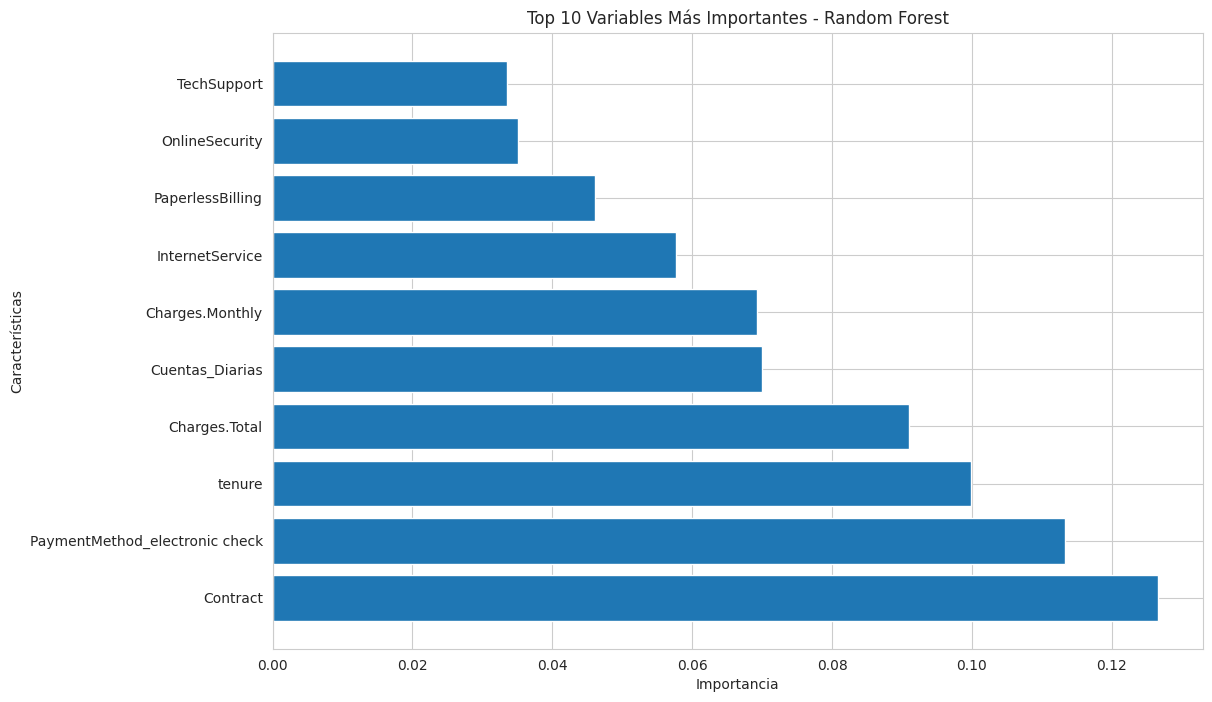

In [30]:
# Obtener la importancia de las variables de Random Forest
importances_rf = best_rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia
features = X.columns
importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

# Visualizar las 10 variables más importantes
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.barh(importance_df_rf['Feature'][:10], importance_df_rf['Importance'][:10])
plt.title("Top 10 Variables Más Importantes - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

#XGBoost

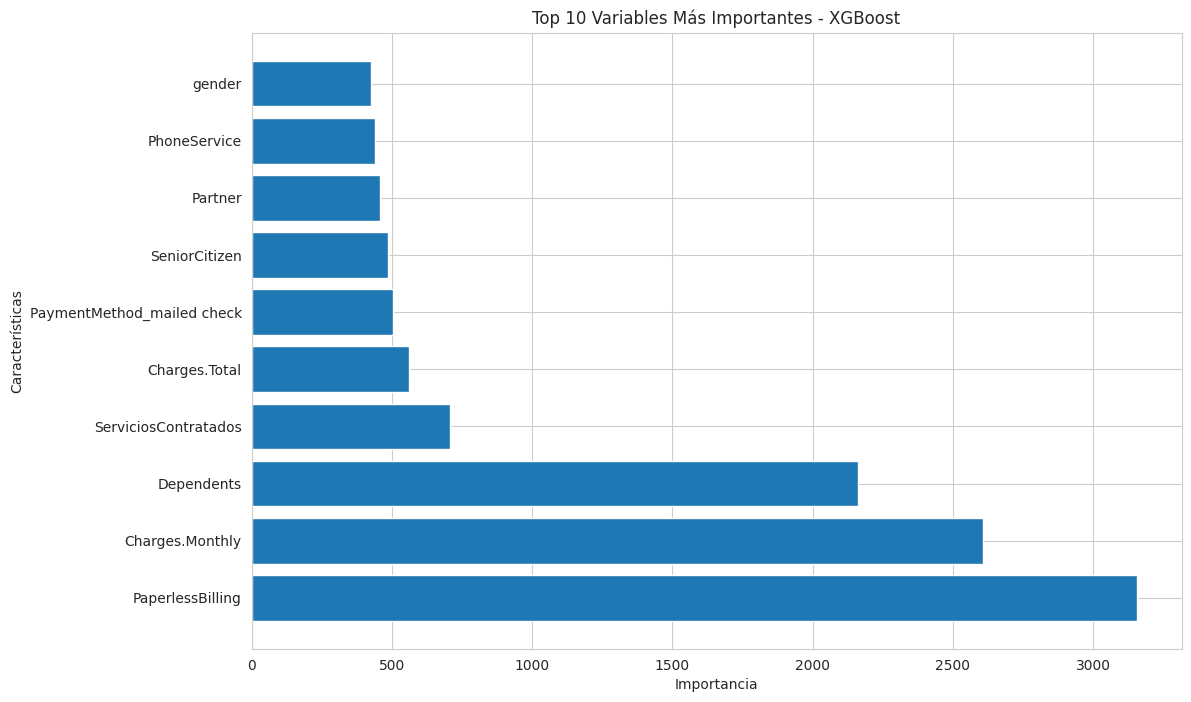

In [31]:
# Obtener la importancia de las variables de XGBoost
importances_xgb = best_xgb_model.get_booster().get_score(importance_type='weight')

# Convertir la importancia a un DataFrame con los nombres correctos
importance_df_xgb = pd.DataFrame({
    'Feature': list(importances_xgb.keys()),
    'Importance': list(importances_xgb.values())
}).sort_values(by='Importance', ascending=False)

# Reemplazar los nombres 'f1', 'f2', ... con los nombres originales de las características
feature_names = X.columns.tolist()
importance_df_xgb['Feature'] = importance_df_xgb['Feature'].apply(lambda x: feature_names[int(x[1:])-1])

# Visualizar las 10 variables más importantes
plt.figure(figsize=(12, 8))
plt.barh(importance_df_xgb['Feature'][:10], importance_df_xgb['Importance'][:10])
plt.title("Top 10 Variables Más Importantes - XGBoost")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

#Informe Detallado sobre la Predicción de la Cancelación de Clientes
#1. Introducción
La predicción de la cancelación de clientes (Churn) es crucial para optimizar la retención de clientes en empresas. Este informe tiene como objetivo identificar los factores clave que influyen en la cancelación de clientes mediante el uso de modelos de Random Forest y XGBoost. Además, se proponen estrategias de retención basadas en los hallazgos obtenidos.

#2. Análisis de los Factores que Influyen en la Cancelación
A partir de los modelos Random Forest y XGBoost, se han identificado varios factores clave que afectan la probabilidad de cancelación de un cliente. Los siguientes factores destacan en ambos modelos:

##2.1 Random Forest: Importancia de las Variables
Gasto Total (Charges_Total): Los clientes con mayores gastos tienden a cancelar más. Esta variable muestra una correlación significativa con la cancelación.
Tiempo de Contrato (tenure): Los clientes con más tiempo de permanencia en la empresa son menos propensos a cancelar.
Método de Pago (PaymentMethod): Los clientes que utilizan métodos de pago electrónicos tienden a cancelar con mayor frecuencia.
Soporte Técnico (TechSupport): La falta de soporte técnico es un factor importante en la cancelación; los clientes sin soporte son más propensos a cancelar.
##2.2 XGBoost: Importancia de las Variables
Gasto Mensual (Charges_Monthly): Al igual que en Random Forest, el gasto mensual es crucial para la predicción de la cancelación.
Tipo de Contrato (Contract): Los contratos mensuales tienen una mayor tasa de cancelación, en comparación con los contratos de dos años.
Soporte Técnico (TechSupport): La falta de soporte técnico también es un factor importante en XGBoost, similar a lo que se observó en Random Forest.
2.3 Factores Comunes en Ambos Modelos:
Gasto Total y Tiempo de Contrato son factores clave que ambos modelos consideran altamente relevantes para predecir la cancelación de los clientes.
Soporte Técnico es otro factor recurrente en ambos modelos, lo que sugiere que una atención al cliente deficiente está relacionada con una mayor probabilidad de cancelación.
#3. Rendimiento de los Modelos
##3.1 Random Forest:
Exactitud (Accuracy): 79.16%
Precisión: 0.59 (para la clase "Sí cancelaron")
Recall: 0.58 (para la clase "Sí cancelaron")
F1-score: 0.59
##3.2 XGBoost:
Exactitud (Accuracy): 79.02%
Precisión: 0.60 (para la clase "Sí cancelaron")
Recall: 0.55 (para la clase "Sí cancelaron")
F1-score: 0.57
Análisis Comparativo:
Exactitud: Ambos modelos tienen un desempeño muy similar, con Random Forest ligeramente superior (79.16% frente a 79.02% de XGBoost).
Precisión: XGBoost tiene una ligera ventaja en precisión (0.60 frente a 0.59 de Random Forest), lo que indica que es un poco más confiable cuando predice cancelaciones.
Recall: Random Forest tiene un mejor recall para la clase "Sí cancelaron" (0.58 frente a 0.55 de XGBoost), lo que sugiere que Random Forest es ligeramente mejor para identificar a los clientes que realmente cancelan.
F1-score: Ambos modelos tienen un F1-score similar (0.59 en Random Forest y 0.57 en XGBoost), lo que indica que tienen un rendimiento balanceado entre precisión y recall.
#4. Estrategias de Retención Basadas en los Resultados
Con base en los factores clave identificados y los resultados obtenidos de los modelos, a continuación, proponemos estrategias para mejorar la retención de clientes y reducir la tasa de cancelación:

##4.1 Mejorar la Retención de Clientes con Alto Gasto
Estrategia: Ofrecer descuentos personalizados o beneficios a clientes con mayor gasto para fomentar su lealtad.
Propuesta: Implementar un programa de recompensas que premie a los clientes con alto gasto o les ofrezca descuentos en sus facturas mensuales.
##4.2 Incentivar Contratos a Largo Plazo
Estrategia: Fomentar los contratos a largo plazo ofreciendo descuentos o beneficios adicionales para aquellos clientes que elijan contratos de 1 o 2 años.
Propuesta: Introducir contratos a largo plazo con precios fijos para aumentar la estabilidad de los clientes y reducir la probabilidad de cancelación.
##4.3 Mejorar el Soporte Técnico
Estrategia: Mejorar la calidad y accesibilidad del soporte técnico, ya que la falta de atención al cliente está fuertemente relacionada con la cancelación.
Propuesta: Introducir un chat en vivo 24/7 o crear una base de conocimiento en línea con tutoriales y guías para ayudar a los clientes a resolver sus problemas rápidamente.
##4.4 Diversificar Métodos de Pago
Estrategia: Ofrecer más opciones de pago automático y métodos de pago electrónicos, especialmente para clientes con mayor probabilidad de cancelar.
Propuesta: Proveer descuentos o beneficios para clientes que opten por métodos de pago electrónicos, mejorando su experiencia.
##4.5 Monitorización Proactiva de Cancelaciones
Estrategia: Implementar un sistema de alertas proactivas para identificar clientes en riesgo de cancelación, basado en sus patrones de comportamiento.
Propuesta: Utilizar el análisis predictivo para intervenir antes de que el cliente cancele, ofreciéndole promociones personalizadas o soluciones específicas a sus problemas.
#5. Conclusión
Los resultados obtenidos muestran que tanto Random Forest como XGBoost son modelos robustos para predecir la cancelación de clientes, con XGBoost teniendo un mejor recall y Random Forest siendo ligeramente más preciso en la predicción de cancelaciones.

Los factores más influyentes en la cancelación de clientes son el gasto total, el tiempo de contrato y la calidad del soporte técnico. A partir de estos hallazgos, las estrategias propuestas para mejorar la retención incluyen incentivos para contratos a largo plazo, mejoras en el soporte técnico y la personalización de beneficios basados en el gasto del cliente.

Estas estrategias permitirán a las empresas reducir la tasa de cancelación y mejorar la satisfacción general de los clientes, contribuyendo a una mayor lealtad y estabilidad a largo plazo.

Si te gustaría proceder con alguna de estas estrategias o realizar algún ajuste en los modelos, estaré encantado de ayudarte.